# QC report: HILICpos Rafi samples 
- Minghao Gong; 07/27/2022
- This notebook specifically fits Asari run

# Load libraries

In [25]:
# Let the middle rows included.
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [26]:
#load libraries 
shhh <- suppressPackageStartupMessages # It's a library, so shhh!
shhh(library(FactoMineR))
shhh(library(factoextra))
shhh(library(reshape2))
shhh(library(tidyverse))
shhh(library(RColorBrewer))
shhh(library(gridExtra))
shhh(library(pheatmap))
library(repr)#jupyter notebook R ; image manipulation 
#shhh(library(devtools))
#install_github("vqv/ggbiplot")
shhh(library(ggbiplot))
options(warn=-1)#dont show warnings in Output 
options(digits = 14) # Or any higher number; fixing decimal places

library("rjson")

source('./utilis/utlis_MQC.R')

# Read tables

## load Metadata & feature table
- Here first use the peak Area table

# !!! What meta/feature/filtered tables in use?
- HILICpos

In [27]:
meta_path <- "../../input/sequence_file/clean_meta_df_wt1_HILICpos.csv"
featab_path <- "../../input/HILICpos_mzML/output_asari_project_223172519/preferred_Feature_table.tsv"
# filtered_featab_path <- "../../output/asari_prep_HILICpos_10//blankM_groupFil0.4_HILICpos_featab.csv"

#### Read metadata table

In [28]:
# metadata information
meta_df <- read_csv(meta_path)

Rows: 24 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): tID, Sample ID, tID_dedup, class, biological_samples
dbl (2): index, cell_number

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [29]:
head(meta_df)

index tID           Sample ID       tID_dedup    class     
1  0    nist_1        nist_1          nist         nist      
2  2    nist_3        nist_3          nist         nist      
3  4    nist_5        nist_5          nist         nist      
4 12    q3June2014_1b q3June2014_1b_1 q3June2014_1 q3June2014
5 14    q3June2014_1b q3June2014_1b_3 q3June2014_1 q3June2014
6 16    q3June2014_1b q3June2014_1b_5 q3June2014_1 q3June2014
  biological_samples cell_number
1 No                 NA         
2 No                 NA         
3 No                 NA         
4 No                 NA         
5 No                 NA         
6 No                 NA

#### Read in the feature table
- Of note, since it is using tibble, row.names are suppressed; `COMP ID` comes as the first columns

In [30]:
asari_df <- read_delim(featab_path,delim = '\t')

Rows: 9756 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): id_number
dbl (34): mz, rtime, rtime_left_base, rtime_right_base, parent_masstrack_id,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [31]:
asari2data_feat_df_regExpr <- function(asari_df,regExpr_sample_cols) {
    sample_col_index = grep(regExpr_sample_cols,colnames(asari_df))
    featab_df = asari_df[,c(1,sample_col_index)]
    return(featab_df)
}

asari2data_feat_df_index <- function(asari_df,end_index = 11) {
    featab_df = asari_df[,c(1,end_index:ncol(asari_df))]
    return(featab_df)
}

In [32]:
featab_df = asari2data_feat_df_index(asari_df,12)

In [33]:
dim(featab_df)

[1] 9756   25

In [34]:
head(featab_df) # examine the table

id_number nist_1  G1_Naive_1_300_1 G1_Naive_2_300_1 G1_Naive_3_300_1
1 F1        1224772      0                0                0          
2 F5              0      0                0                0          
3 F6              0 163014           185168           311919          
4 F7              0 134222            44310           101329          
5 F8          73717      0                0                0          
6 F9        2742872      0                0                0          
  G2_R5pos_1_142_1 G2_R5pos_2_200_1 G2_R5pos_3_150_1 G3_R5neg_1a_655_1
1      0                0                0                0           
2      0                0                0                0           
3 133599           101565           110948           368629           
4  80291           136212            83206           367391           
5      0                0                0                0           
6      0                0                0                0           
  G3_R5neg_1b_655_1 G3_R5neg_2a_687_1 G3_R5neg_2b_687_1 G3_R5neg_3a_865_1
1      0                 0                 0                 0           
2      0                 0                 0                 0           
3 137644            103785            334050            410553           
4 130567             65650            117937            166892           
5      0                 0                 0                 0           
6      0                 0                 0                 0           
  G3_R5neg_3b_865_1 nist_3  nist_5  q3June2014_1b_1 q3June2014_1b_3
1      0            2637326 2387814 1207724         1045345        
2      0                  0       0  535580          781938        
3 282564                  0       0       0               0        
4 168016                  0       0       0               0        
5      0             933477       0  756347               0        
6      0             239561       0  153526               0        
  q3June2014_1b_5 q3June2014_2a_1 q3June2014_2a_3 q3June2014_2a_5
1 1231387         1400313         1448103         797729         
2       0          646521          539292         660628         
3       0               0               0              0         
4       0               0               0              0         
5  742624          668085          492220              0         
6  105437          210421          154596              0         
  q3June2014_2b_1 q3June2014_2b_3 q3June2014_2b_5
1 819349          820781           800500        
2      0               0          1252403        
3      0               0                0        
4      0               0                0        
5      0          401752                0        
6      0          169455                0

#### procedure for preoprocessing of data
- log2-transformation (currently the missing data is denoted by NA)
- Analysis the TIC
- Correlation heatmap

In [35]:
log2transform <- function(featab_df) {
    featab_df[featab_df == 0] = NA
    featab_df.log <- cbind(featab_df[,1],log2(featab_df[, 2:ncol(featab_df)])) # no need to add +1
    # featab_df.log[is.na(featab_df.log)] = 0
    return(featab_df.log)
}

In [36]:
# separate the annotation and feature values part and do log2 conversion
featab_df.log <- log2transform(featab_df) # no need to add +1
head(featab_df.log)

id_number nist_1          G1_Naive_1_300_1 G1_Naive_2_300_1 G1_Naive_3_300_1
1 F1        20.224081775626              NA               NA               NA 
2 F5                     NA              NA               NA               NA 
3 F6                     NA 17.314636346030  17.498475273736  18.250811909069 
4 F7                     NA 17.034261633975  15.435344706373  16.628687601870 
5 F8        16.169709739542              NA               NA               NA 
6 F9        21.387255867677              NA               NA               NA 
  G2_R5pos_1_142_1 G2_R5pos_2_200_1 G2_R5pos_3_150_1 G3_R5neg_1a_655_1
1              NA               NA               NA               NA  
2              NA               NA               NA               NA  
3 17.027549683593  16.632043799522  16.759524135518  18.491810046519  
4 16.292950661401  17.055494281883  16.344399944672  18.486956759530  
5              NA               NA               NA               NA  
6              NA               NA               NA               NA  
  G3_R5neg_1b_655_1 G3_R5neg_2a_687_1 G3_R5neg_2b_687_1 G3_R5neg_3a_865_1
1              NA                NA                NA                NA  
2              NA                NA                NA                NA  
3 17.070582197636   16.663238421125   18.349704533284   18.647208951986  
4 16.994430785163   16.002507390668   16.847656875895   17.348555274932  
5              NA                NA                NA                NA  
6              NA                NA                NA                NA  
  G3_R5neg_3b_865_1 nist_3          nist_5          q3June2014_1b_1
1              NA   21.330644483156 21.187259030831 20.203859363949
2              NA                NA              NA 19.030742561986
3 18.108218145594                NA              NA              NA
4 17.358239100426                NA              NA              NA
5              NA   19.832254950670              NA 19.528688746349
6              NA   17.870033534123              NA 17.228123474623
  q3June2014_1b_3 q3June2014_1b_5 q3June2014_2a_1 q3June2014_2a_3
1 19.995547729473 20.231852812249 20.417317905835 20.465732790740
2 19.576694694964              NA 19.302337706195 19.040707107125
3              NA              NA              NA              NA
4              NA              NA              NA              NA
5              NA 19.502272415163 19.349672141922 18.908943753352
6              NA 16.686021701463 17.682919167109 17.238143466049
  q3June2014_2a_5 q3June2014_2b_1 q3June2014_2b_3 q3June2014_2b_5
1 19.605539199885 19.644118570163 19.646637809277 19.610541877178
2 19.333478592418              NA              NA 20.256267438742
3              NA              NA              NA              NA
4              NA              NA              NA              NA
5              NA              NA 18.615945680373              NA
6              NA              NA 17.370542680564              NA

### Overall Density Distribution of data 
  

- first two columns are gona be mz and rt and rest should be the samples ; nothing else 

- two parameters needed : 
  - data : - Data can be log2(prefferably) /linear; if have nas will be imputed to calulate density
  
  - y_lim_param; to adjust height of y axis(desnity) in the plot; later to automate it may be 
  

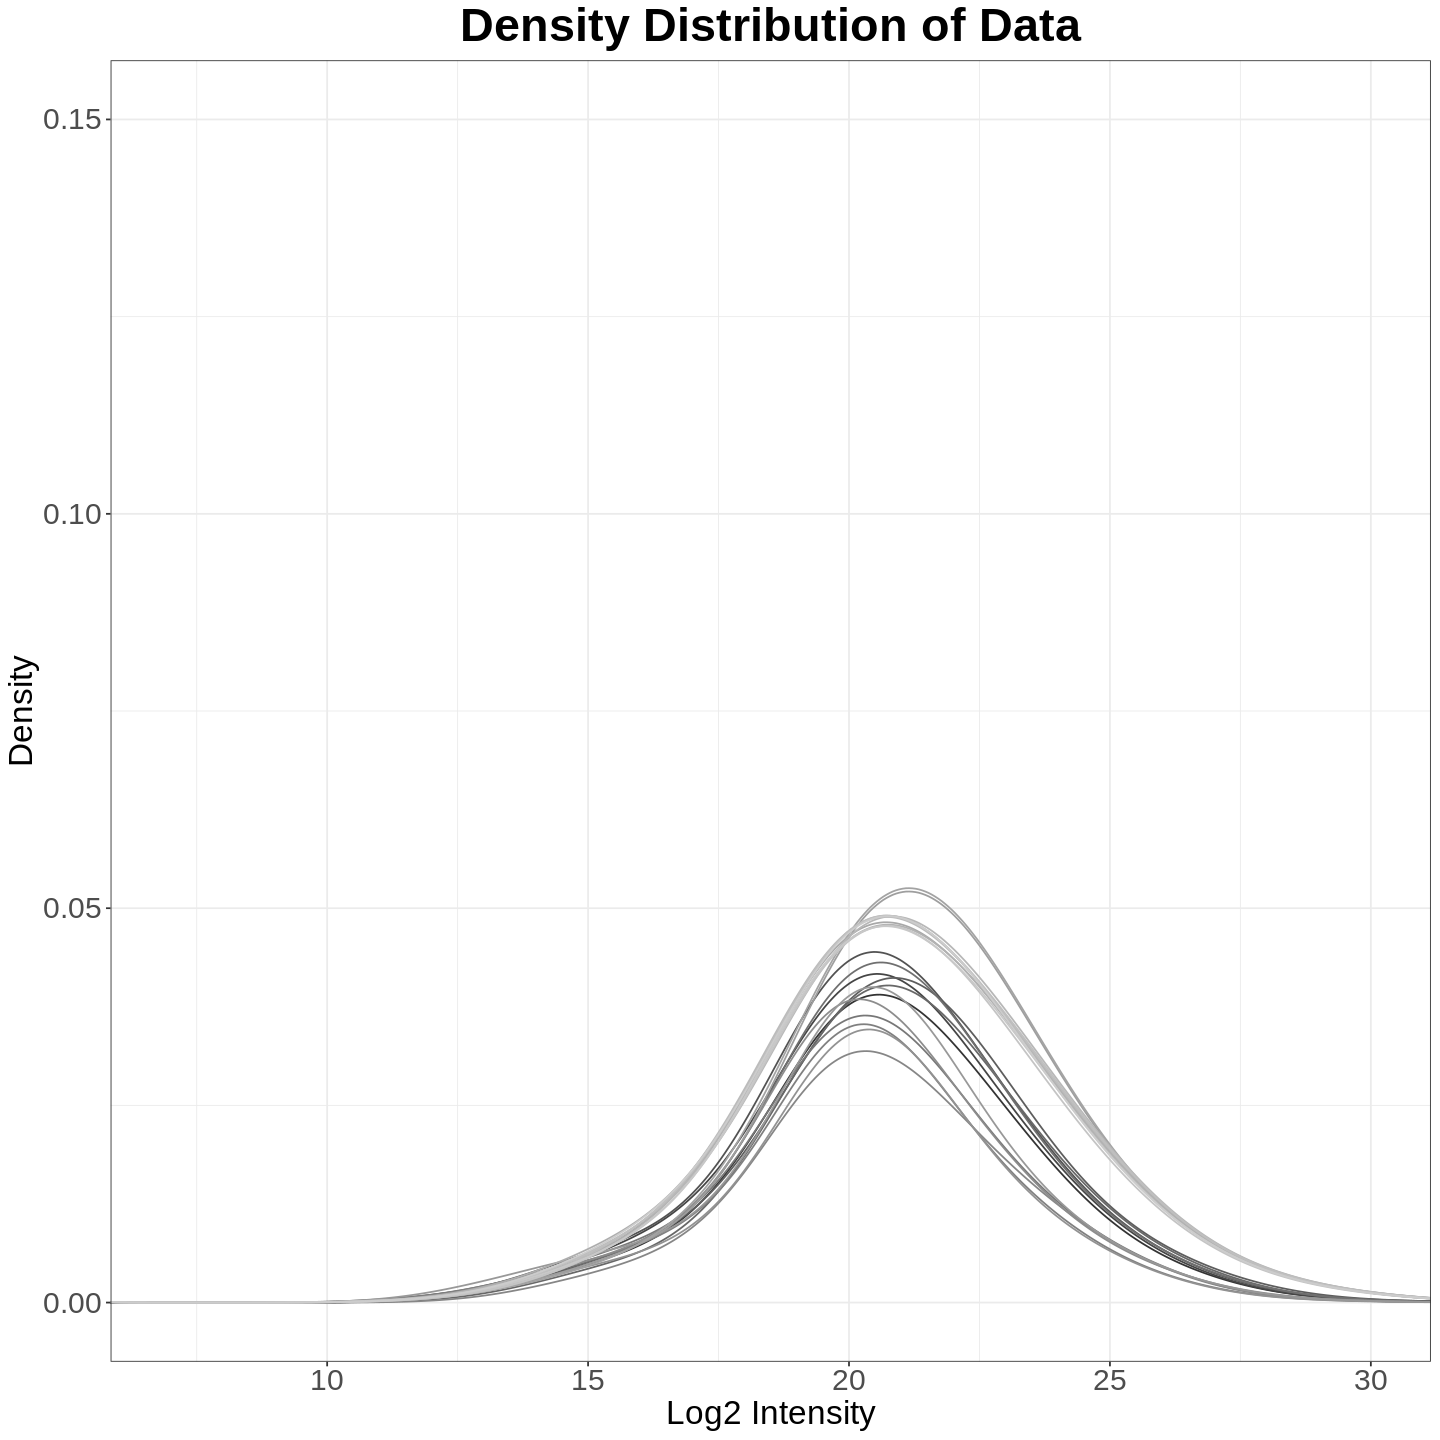

In [37]:
options(repr.plot.width=12, repr.plot.height=12, res=200)
suppressMessages(custom_density_plot(featab_df.log[,2:ncol(featab_df.log)], 
                                     y_lim_param=0.15))

### Mean TIC ACross Samples 

Input:

- data ; if nas ; willl be imputed for 0s within the function because we need to take into account the missing values in each sample to properly detect low intensity samples 
- optional ; metadata ; if present will factor color it ; if not then will not 


Note ; if x-axis need be changed for fontsize ; use   axis.title.x = element_text( size=16) in plotMeanTic function to control;

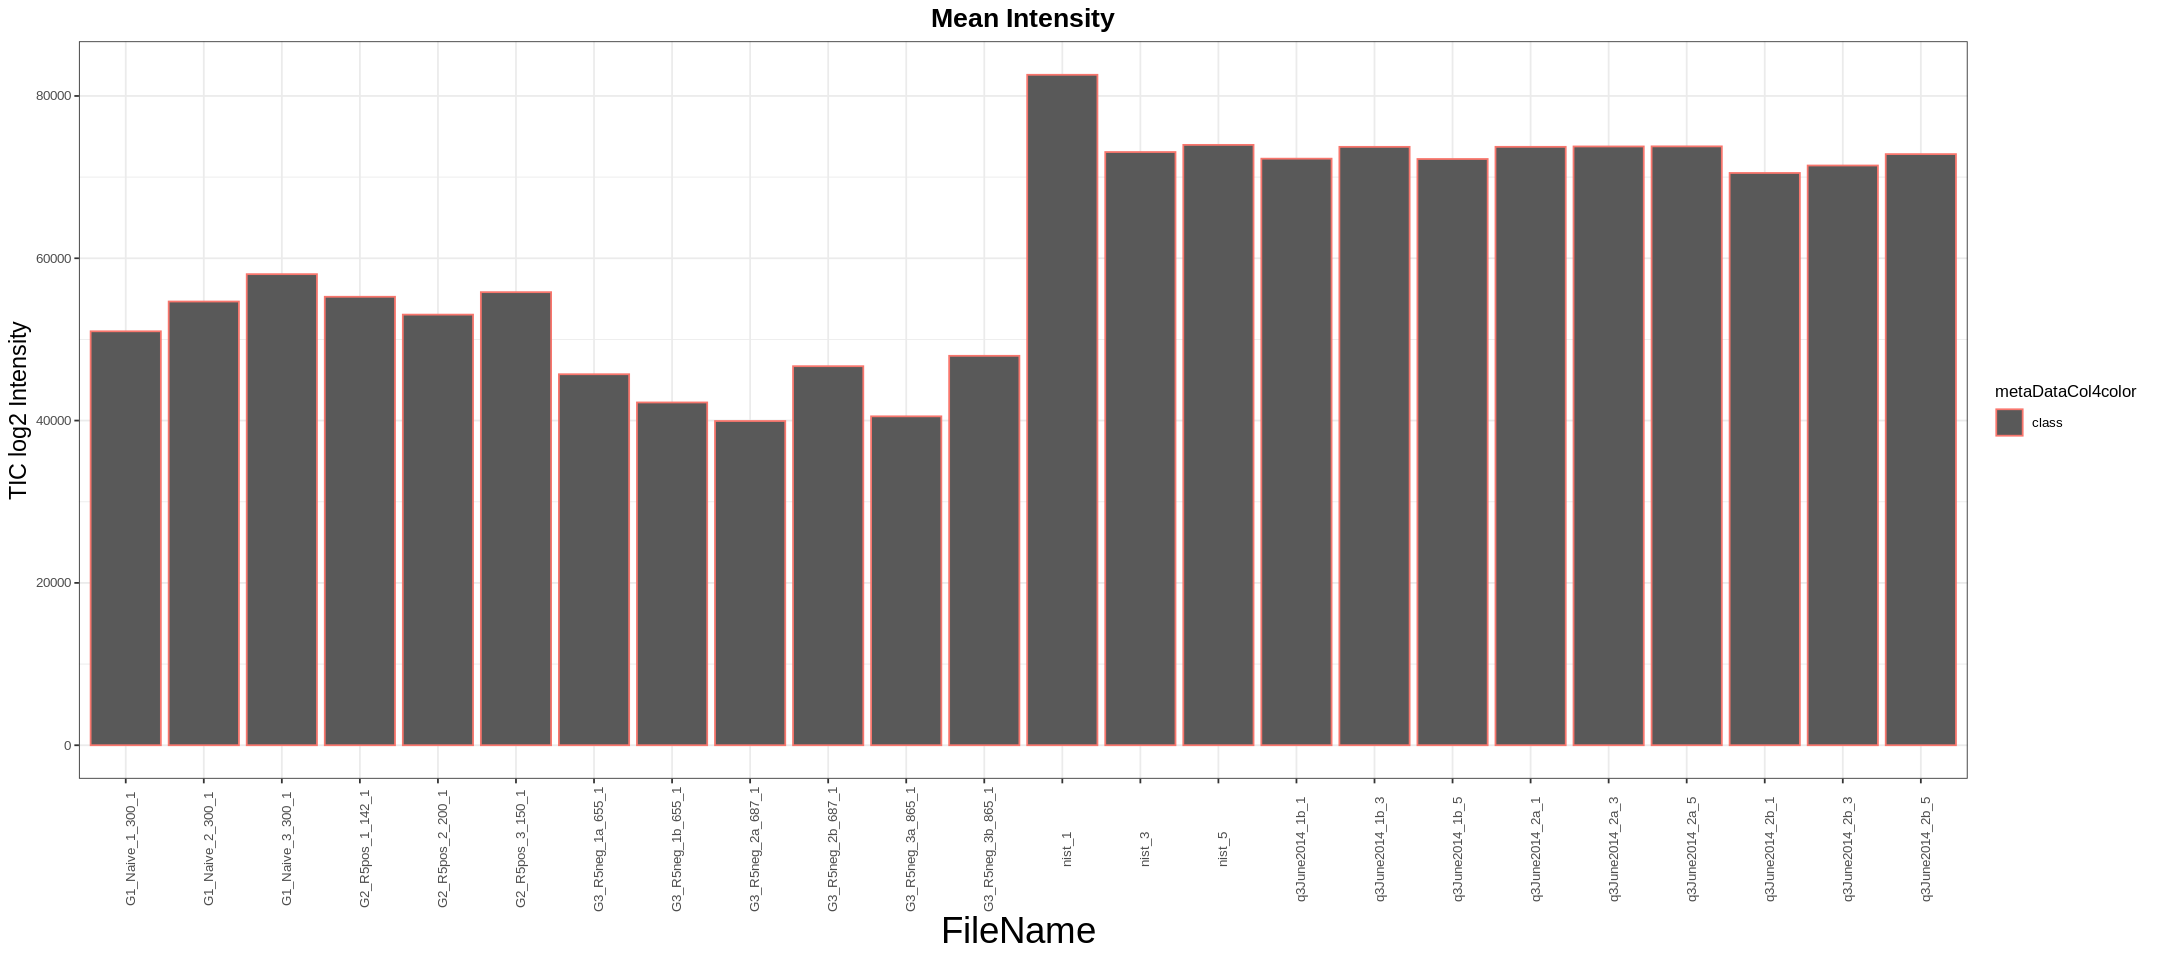

In [38]:
options(repr.plot.width=18, repr.plot.height=8, res=200)
suppressMessages(plotTIC(featab_df.log,meta_df,"Sample ID","class"))
#control xaxis font size;axis.title.x = element_text( size=16)

## Decide SD cutoff for outliers by yourself if need be

In [39]:
get_TIC_outliers(featab_df.log,2)

columnsum Sample.ID

### Missing values plot 

Input:

- logged 2/linear scale  data with nas ; no imputation happening in the function as i am counting Nas 


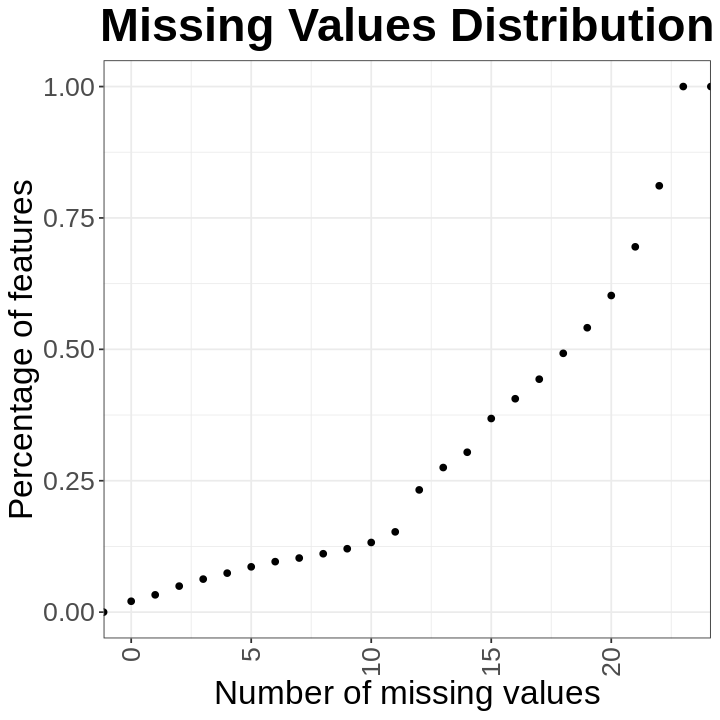

In [40]:
source('./utilis/utlis_MQC.R')
options(repr.plot.width=6, repr.plot.height=6, res=200)
plot_NA_cdf(featab_df.log, present_percentage = FALSE)

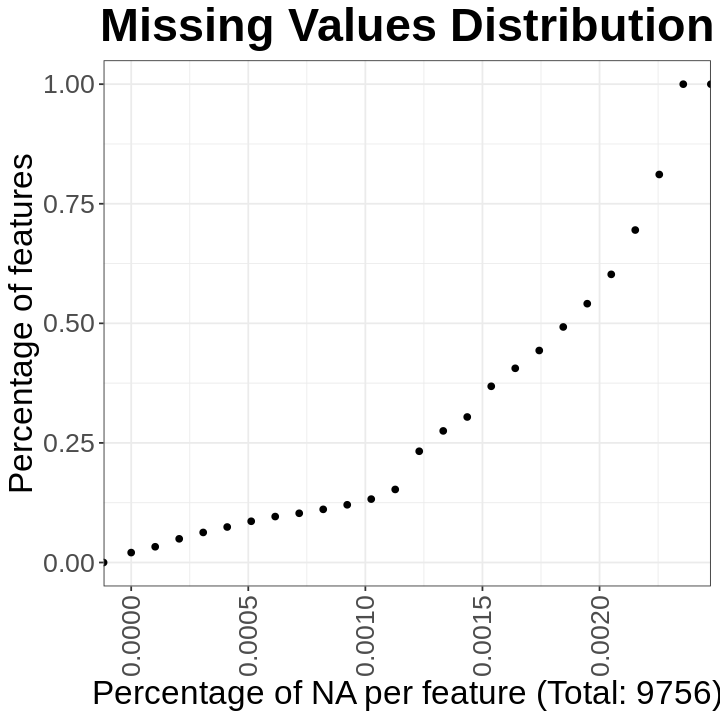

In [41]:
options(repr.plot.width=6, repr.plot.height=6, res=200)
plot_NA_cdf(featab_df.log, present_percentage = TRUE)

### Corelation bw samples 

In [42]:
# A function that help later step as correlation plot cannot handle very well with zero values
mssingValueAsNA <- TRUE # NA is good to skip this step
if (!mssingValueAsNA) {
    featab_df.log.NA <- featab_df.log
    featab_df.log.NA[featab_df.log == 0] <- NA  # Turn 0 into NA
    featab_df.log <- featab_df.log.NA
}

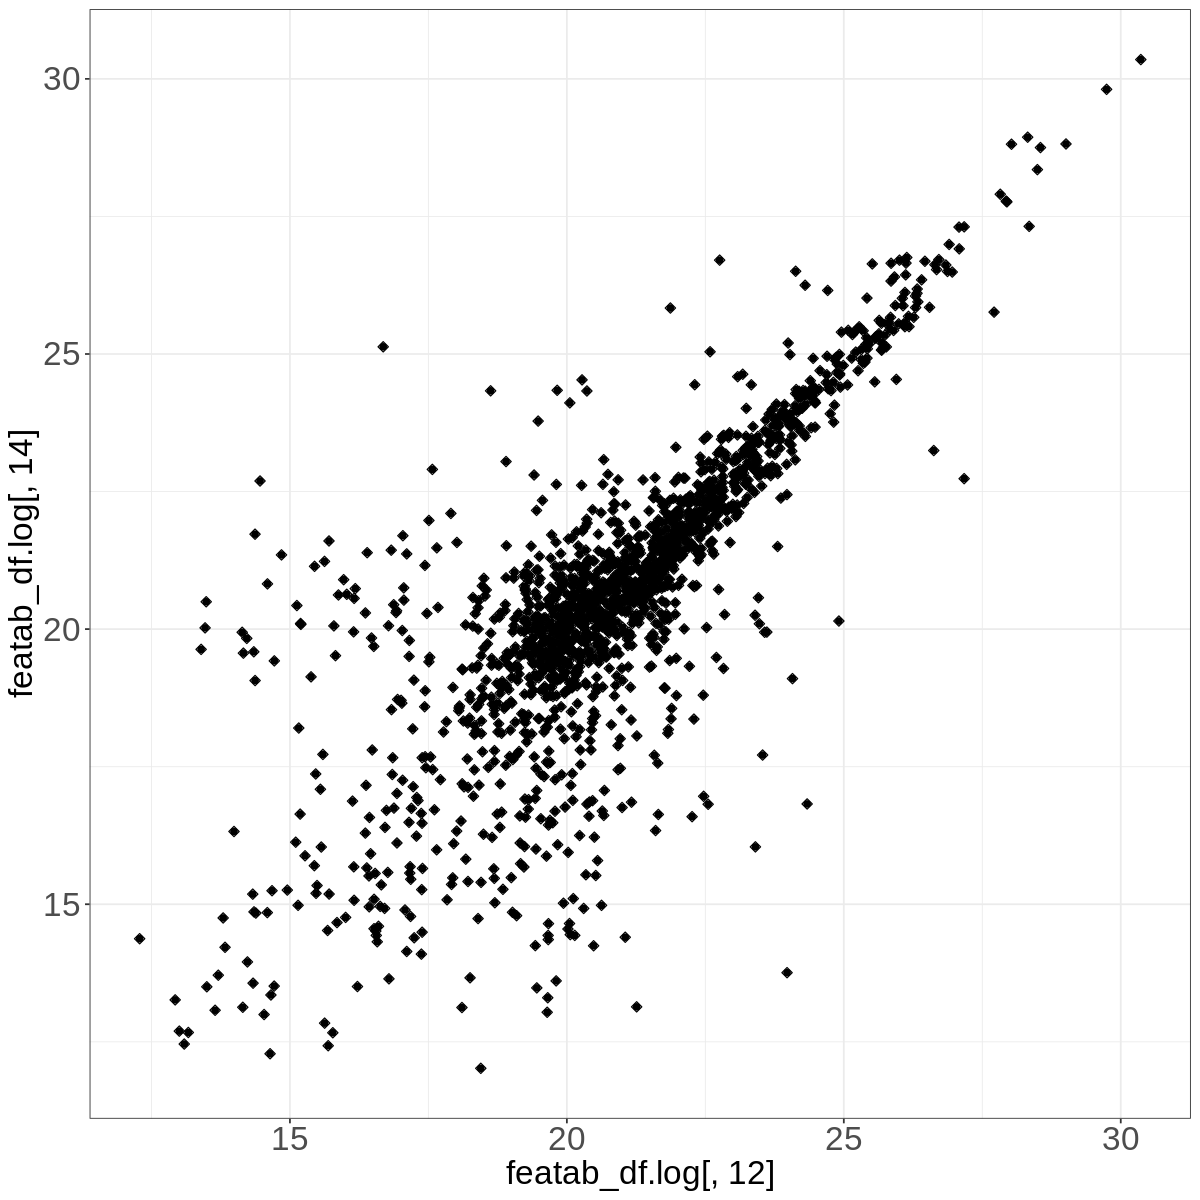

In [43]:
#options(repr.plot.width=16, repr.plot.height=20, res=200)
# reproducibility of injection replicates
#figure options ; change to the needs
options(repr.plot.width=10, repr.plot.height=10)
  ggplot(featab_df.log, aes(x=featab_df.log[,12], y=featab_df.log[,14])) + geom_point()+
  geom_point(size=2, shape=23) +# Change the point size, and shape
  theme_bw()+#axis settings 
    theme(axis.text=element_text(size=20))+
 #axis labels settings 
    theme(axis.title=element_text(size=20))

## Heatmap 

Input: 
- data; log2/linear scale data with nas 
- metadata is optional 
- metadata include what to colors.

WishList Note:  fix if metadata is not passed; debug

In [44]:
colnames(meta_df)

[1] "index"              "tID"                "Sample ID"         
[4] "tID_dedup"          "class"              "biological_samples"
[7] "cell_number"

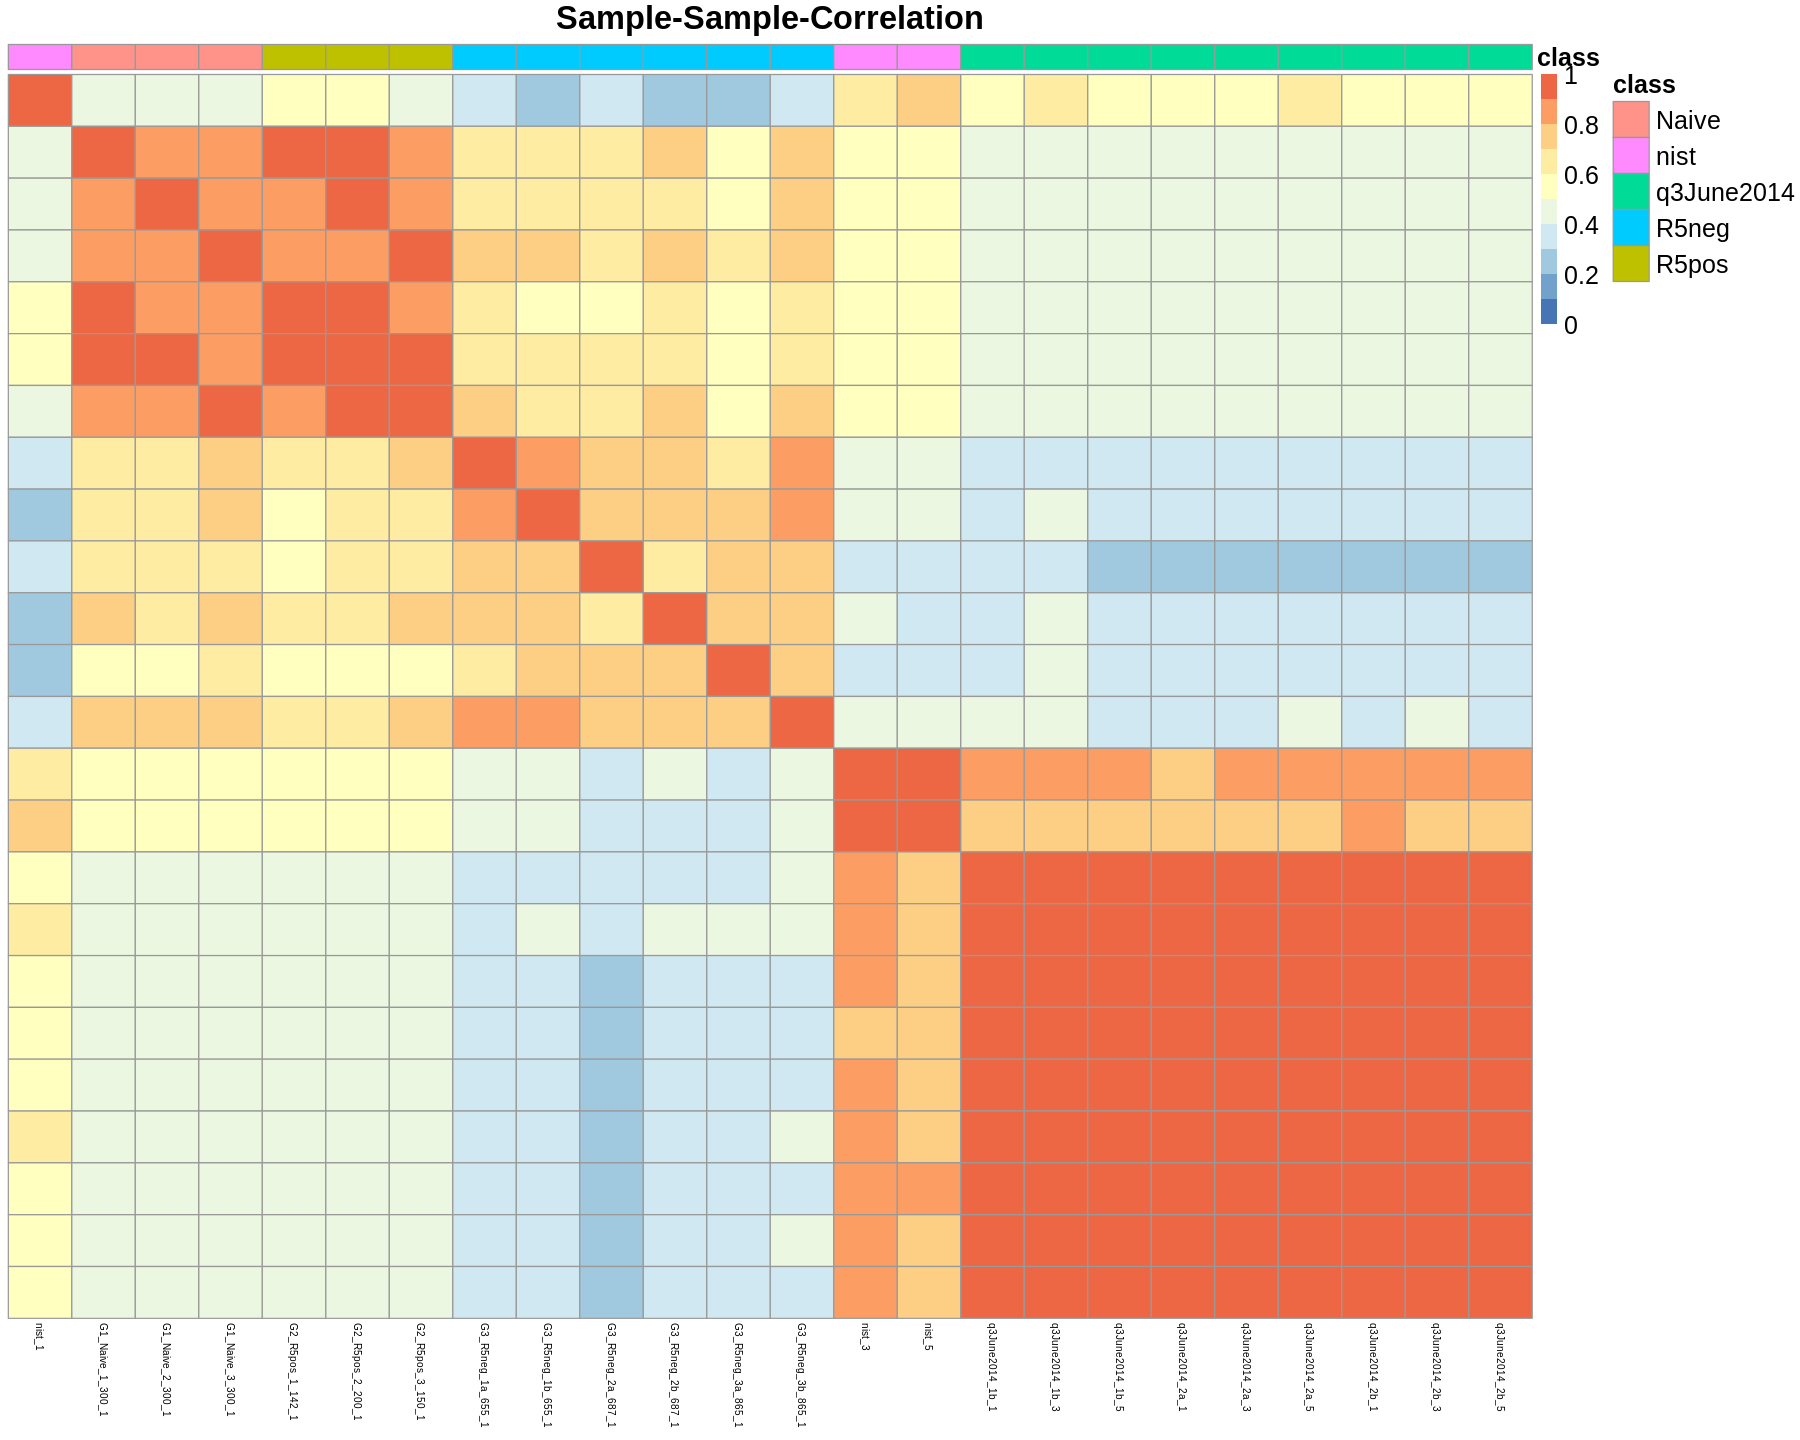

In [45]:
options(repr.plot.width=15, repr.plot.height=12, res=300)
suppressMessages(plot_heatmap(featab_df.log, meta_df, "Sample ID","class"))

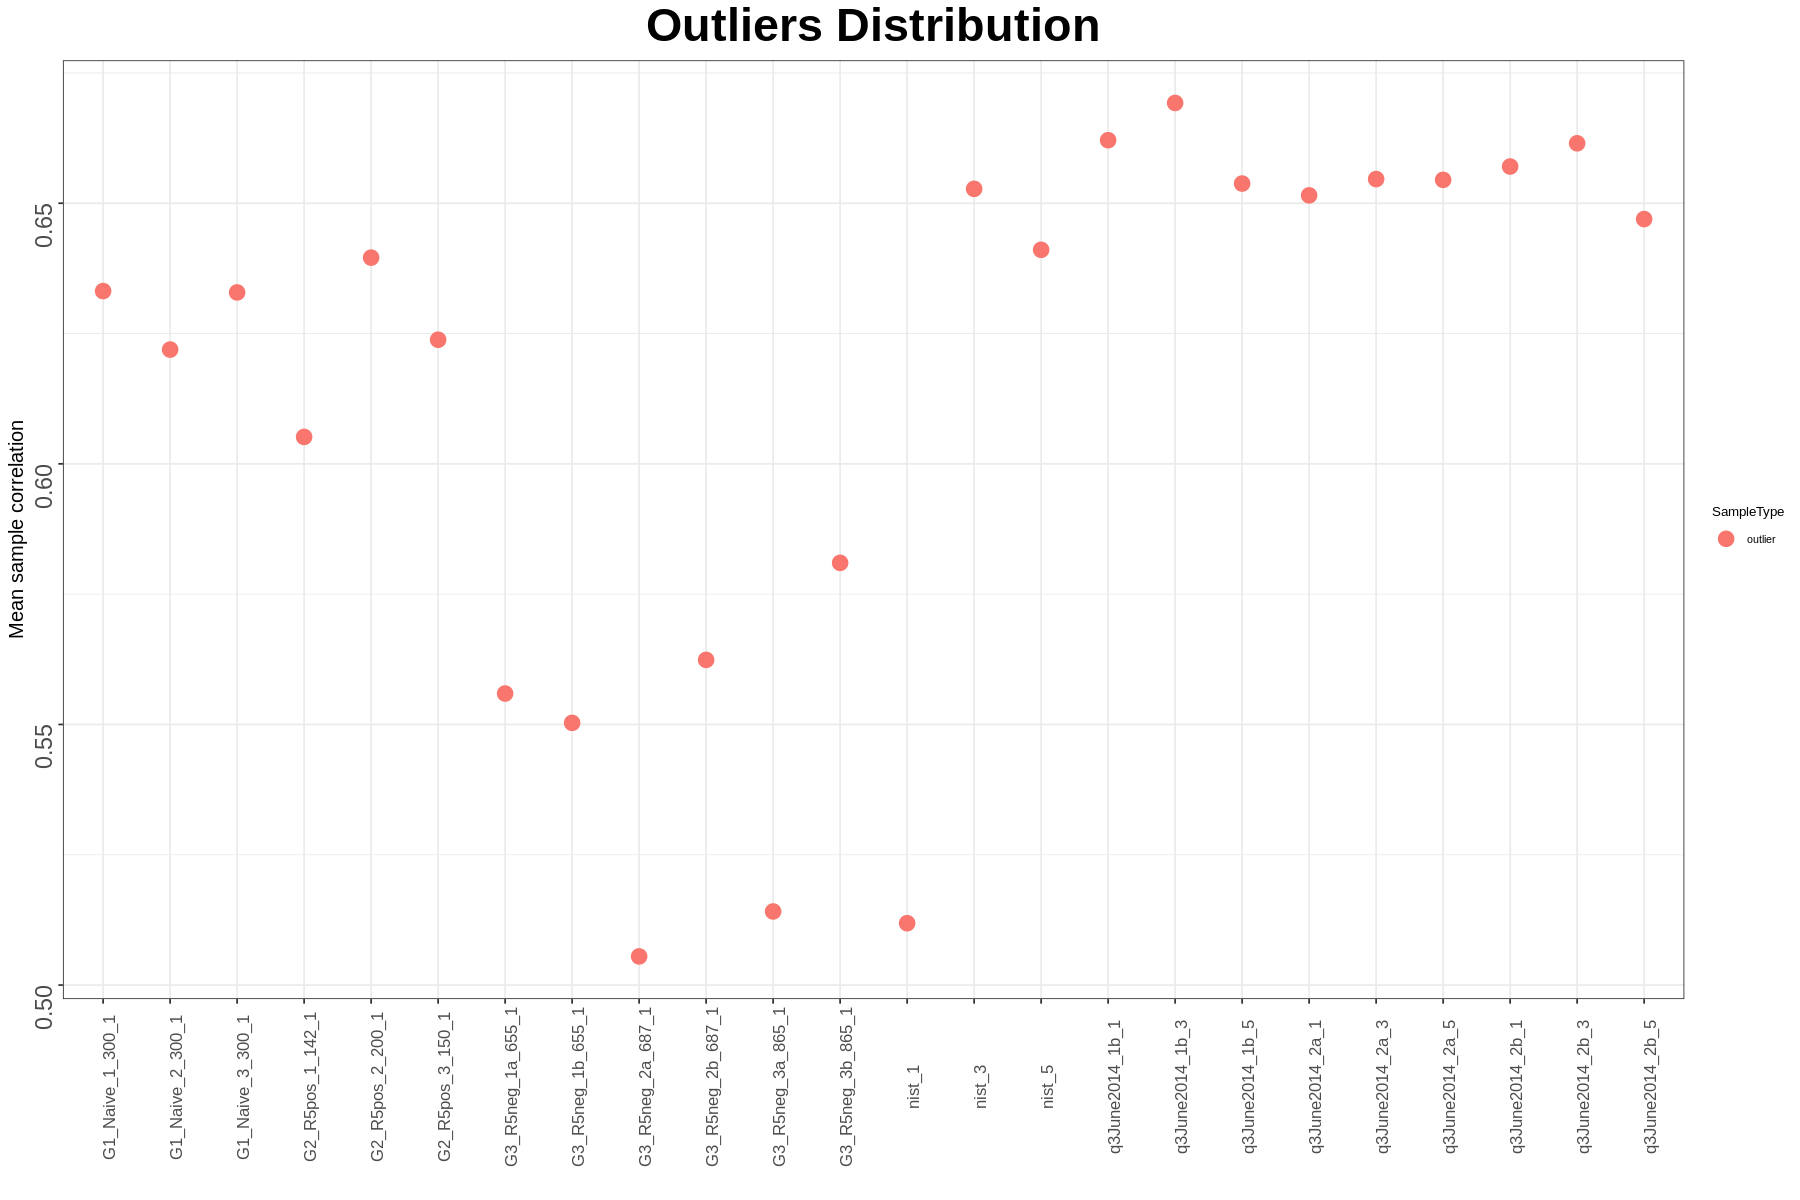

In [46]:
df.outliers <-  get_outliers_heatmap(featab_df.log)
options(repr.plot.width=15, repr.plot.height=10, res=300)
getoutliersplot(df.outliers)

In [47]:
filtered.df.outliers<-df.outliers %>% filter(SampleType=="outlier")
filtered.df.outliers

samples           columnmeancor    SampleType
nist_1            nist_1            0.51186825729135 outlier   
G1_Naive_1_300_1  G1_Naive_1_300_1  0.63314699206493 outlier   
G1_Naive_2_300_1  G1_Naive_2_300_1  0.62192151270380 outlier   
G1_Naive_3_300_1  G1_Naive_3_300_1  0.63288600449674 outlier   
G2_R5pos_1_142_1  G2_R5pos_1_142_1  0.60516589011798 outlier   
G2_R5pos_2_200_1  G2_R5pos_2_200_1  0.63956515076083 outlier   
G2_R5pos_3_150_1  G2_R5pos_3_150_1  0.62381289655671 outlier   
G3_R5neg_1a_655_1 G3_R5neg_1a_655_1 0.55593796358138 outlier   
G3_R5neg_1b_655_1 G3_R5neg_1b_655_1 0.55030435463537 outlier   
G3_R5neg_2a_687_1 G3_R5neg_2a_687_1 0.50549940925669 outlier   
G3_R5neg_2b_687_1 G3_R5neg_2b_687_1 0.56238616238575 outlier   
G3_R5neg_3a_865_1 G3_R5neg_3a_865_1 0.51411893164577 outlier   
G3_R5neg_3b_865_1 G3_R5neg_3b_865_1 0.58100210253202 outlier   
nist_3            nist_3            0.65276086247893 outlier   
nist_5            nist_5            0.64106242550492 outlier   
q3June2014_1b_1   q3June2014_1b_1   0.66209177098075 outlier   
q3June2014_1b_3   q3June2014_1b_3   0.66924268644925 outlier   
q3June2014_1b_5   q3June2014_1b_5   0.65377476669146 outlier   
q3June2014_2a_1   q3June2014_2a_1   0.65151132712514 outlier   
q3June2014_2a_3   q3June2014_2a_3   0.65463519804604 outlier   
q3June2014_2a_5   q3June2014_2a_5   0.65448757336335 outlier   
q3June2014_2b_1   q3June2014_2b_1   0.65704472188927 outlier   
q3June2014_2b_3   q3June2014_2b_3   0.66150091920831 outlier   
q3June2014_2b_5   q3June2014_2b_5   0.64696114075407 outlier

# PCA

## Here if I use the unfiltered data

In [48]:
plotPCA(featab_df.log, meta_df, "Sample ID", "class", TRUE)

ERROR: Error in if (df.metadata == "nodata") {: the condition has length > 1


## Here I will use the filtered

In [ ]:
# filt_df <- read_csv(filtered_featab_path)

# filt_df = asari2data_feat_df(filt_df,'HEU\\_[0-9]+|HUU\\_[0-9]+')
# filt_df.log2 = log2transform(filt_df)

# ----

# colnames(meta_df)

# plotPCA(filt_df.log2, meta_df, "Sample.ID", "Group", TRUE)

------------

-----